#  **4. Recommender Systems**

Recommender systems are systems which recommend items (such as movies, books, ads) to users based on various information, such as their past viewing/purchasing behavior (e.g., which movies they rated high or low, which ads they clicked on), as well as optional “side information” such as demographics about the user, or information about the content of the item (e.g., its title, genre or price). Such systems are widely used by various internet companies, such as Facebook, Amazon, Netflix, Google, etc.  

The internet has changed how we consume media, products, and services. With so many options and choices, it becomes overwhelming to select the right one. That’s where Recommender Systems come in. Recommender Systems are intelligent algorithms that analyze user behaviour, preferences, and data to suggest personalized recommendations. These systems are widely used in e-commerce, streaming services, social networks, and other domains.

In this chapter, we give a brief introduction to the topic.

![scheme](https://www.researchgate.net/profile/Mohammad-Zahrawi/publication/354259927/figure/fig1/AS:1073092147294208@1632856513395/The-main-types-of-recommendation-system.png)

# **COLLABORATIVE FILTERING**

![advantages](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*7uW5hLXztSu_FOmZOWpB6g.png)

## **4.1 Memory-Based Collaborative Filtering**

**Memory-based** collaborative filtering algorithms, also referred to as **Neighborhood-based** algorithms, were among the earliest algorithms developed for collaborative filtering. These algorithms are based on the fact that similar users display similar patterns of rating behavior and similar items receive similar ratings. There are two primary types of neighborhood-based algorithms:

1. **User-based** collaborative filtering: In this case, the ratings provided by similar users to a target user A are used to make recommendations for A. The predicted ratings of A are computed as the weighted average values of these “peer group” ratings for each item.
   
2. **Item-based** collaborative filtering: In order to make recommendations for target item B, the first step is to determine a set S of items, which are most similar to item B. Then, in order to predict the rating of any particular user A for item B, the ratings in set S, which are specified by A, are determined. The weighted average of these ratings is used to compute the predicted rating of user A for item B.

An important distinction between user-based collaborative filtering and item-based collaborative filtering algorithms is that the ratings in the former case are predicted using the ratings of neighboring users, whereas the ratings in the latter case are predicted using the user’s own ratings on neighboring (i.e., closely related) items. In the former case, neighborhoods are defined by similarities among users (rows of ratings matrix), whereas in the latter case, neighborhoods are defined by similarities among items (columns of ratings matrix). Thus, the two methods share a complementary relationship. Nevertheless, there are considerable differences in the types of recommendations that are achieved using these two methods.
For the purpose of subsequent discussion, we assume that the user-item ratings matrix is an incomplete $m × n$ matrix $R = [r_{uj}]$ containing $m$ users and $n$ items. It is assumed that only a small subset of the ratings matrix is specified or observed. 

Like all other collaborative filtering algorithms, neighborhood-based collaborative filtering algorithms can be formulated in one of two ways:

1. *Predicting the rating value of a user-item combination*: This is the simplest and most primitive formulation of a recommender system. In this case, the missing rating ruj of the user u for item j is predicted.
   
2. *Determining the top-k items or top-k users*: In most practical settings, the merchant is not necessarily looking for specific ratings values of user-item combinations. Rather, it is more interesting to learn the top-k most relevant items for a particular user, or the top-k most relevant users for a particular item. The problem of determining the top-k items is more common than that of finding the top-k users. This is because the former formulation is used to present lists of recommended items to users in Web- centric scenarios. In traditional recommender algorithms, the “top-k problem” almost always refers to the process of finding the top-k items, rather than the top-k users. However, the latter formulation is also useful to the merchant because it can be used to determine the best users to target with marketing efforts.

### **Key propierties of Rating Matrices**

As discussed earlier, we assume that the ratings matrix is denoted by $R$, and it is an m × n matrix containing m users and n items. Therefore, the rating of user u for item j is denoted by ruj. Only a small subset of the entries in the ratings matrix are typically specified. The specified entries of the matrix are referred to as the training data, whereas the unspecified entries of the matrix are referred to as the test data. In that case, all the unspecified entries belong to a special column, which is known as the class variable or dependent variable. Therefore, the recommendation problem can be viewed as a generalization of the problem of classification and regression.

Ratings can be defined in a variety of ways, depending on the application at hand:
1. Continuous ratings. 
2. Interval-based ratings.
3. Ordinal ratings.
4. Binary ratings.
5. Unary ratings.
   

It is noteworthy that the indirect derivation of unary ratings from customer actions is also referred to as implicit feedback, because the customer does not explicitly provide feedback.

### **Long-tail property**

The distribution of ratings among items often satisfies a property in real-world settings, which is referred to as the long-tail property. According to this property, only a small fraction of the items are rated frequently. Such items are referred to as popular items. The vast majority of items are rated rarely. This results in a highly skewed distribution of the underlying ratings. An example of a skewed rating distribution is illustrated in Figure 2.1. The X-axis shows the index of the item in order of decreasing frequency, and the Y -axis shows the frequency with which the item was rated. It is evident that most of the items are rated only a small number of times. Such a rating distribution has important implications for the recommendation process:

1. In many cases, the high-frequency items tend to be relatively competitive items with little profit for the merchant. On the other hand, the lower frequency items have larger profit margins. In such cases, it may be advantageous to the merchant to recommend lower frequency items. In fact, analysis suggests that many companies, such as Amazon, make most of their profit by selling items in the long tail.
   
2. Because of the rarity of observed ratings in the long tail it is generally more difficult to provide robust rating predictions in the long tail. In fact, many recommendation algorithms have a tendency to suggest popular items rather than infrequent items. This phenomenon also has a negative impact on diversity, and users may often become bored by receiving the same set of recommendations of popular items.
   
3. The long tailed distribution implies that the items, which are frequently rated by users, are fewer in number. This fact has important implications for neighborhood- based collaborative filtering algorithms because the neighborhoods are often defined on the basis of these frequently rated items. In many cases, the ratings of these high-frequency items are not representative of the low-frequency items because of the in- herent differences in the rating patterns of the two classes of items. As a result, the prediction process may yield misleading results. As we will discuss in section 7.6 of Chapter 7, this phenomenon can also cause misleading evaluations of recommendation algorithms.

#![longtail](https://lh6.googleusercontent.com/#NlrWR-SLfo5K7w2pFzFqcmWVVe0YNQvtbJ_iIkhGhWwDU6nnkpR0Vzh8xjenCCW2i3hg_Y1MPxNVVoc6zIgC1O14pN-CTYlr9amX1TcgmXi59ryLD5_FnKKov72Oa55HfMY-4eNAQlMrQcBaMQIMIGIEEy8Z1DvnUEFqSOy4GJYv12d8tUmH126RUX-wKw)


The basic idea in neighborhood-based methods is to use either user-user similarity or item- item similarity to make recommendations from a ratings matrix. The concept of a neigh- borhood implies that we need to determine either similar users or similar items in order to make predictions. In the following, we will discuss how neighborhood-based methods can be used to predict the ratings of specific user-item combinations. There are two basic principles used in neighborhood-based models:
- (a) **User-based models**: Similar users have similar ratings on the same item. Therefore, if Alice and Bob have rated movies in a similar way in the past, then one can use Alice’s observed ratings on the movie Terminator to predict Bob’s unobserved ratings on this movie.
- (b) **Item-based models**: Similar items are rated in a similar way by the same user. Therefore, Bob’s ratings on similar science fiction movies like Alien and Predator can be used to predict his rating on Terminator.


![useitem](https://www.researchgate.net/publication/355218515/figure/fig2/AS:1079169563787266@1634305482033/The-collaborative-filtering-algorithms-a-user-based-b-item-based.png)

### **4.1.1 User-based models**

In this approach, user-based neighborhoods are defined in order to identify similar users to the target user for whom the rating predictions are being computed. In order to determine the neighborhood of the target user i, her similarity to all the other users is computed. Therefore, a similarity function needs to be defined between the ratings specified by users. Such a similarity computation is tricky because different users may have different scales of ratings. One user might be biased toward liking most items, whereas another user might be biased toward not liking most of the items. Furthermore, different users may have rated different items. Therefore, mechanisms need to be identified to address these issues.

For the $m \times n$ ratings matrix $R = [r_{uj}]$ with $m$ users and $n$ items, let $I_{u}$ denote the set of item indices for which ratings have been specified by user (row) $u$. For example, if the ratings of the first, third, and fifth items (columns) of user (row) $u$ are specified (observed)and the remaining are missing, then we have $I_{u} = \{1,3,5\}$.

Therefore, the set of items rated by both users $u$ and $v$ is given by $I_{u} \cap I_{v} $. For example, if user $v$ has rated the first fouritems,then $I_{v} =\{1,2,3,4\}$,and $I_{u}\cap I_{v} =\{1,3,5\}\cap\{1,2,3,4\}=\{1,3\}$.

It is possible (and quite common) for $I_{u}\cap I_{v}$ to be an empty set because ratings matrices are generally sparse. The set $I_{u}\cap I_{v}$ defines the mutually observed ratings, which are used to compute the similarity between the $u$ th and $v$ th users for neighborhood computation.

One measure that captures the similarity $Sim(u,v)$ between the rating vectors of two users $u$ and $v$ is the Pearson correlation coefficient. Because $I_{u}\cap I_{v}$ represents the set of item indices for which both user u and user v have specified ratings, the coefficient is computed only on this set of items. 

The first step is to compute the **mean rating $\mu_{u}$** for each user $u$ using her specified ratings:

$$ \mu_{u} = \frac{\sum_{k \in I_{u}} r_{uk}}{|I_{u}|} \quad \forall u \in \{ 1, \cdots, m\}$$

Then, the **Pearson correlation coefficient** between the rows (users) u and v is defined as
follows:

$$Sim(u,v) = Pearson(u,v) = \frac{\sum_{k \in I_{u}\cap I_{v}}(r_{uk} - \mu_{u}) \cdot (r_{vk} - \mu_{v})}{\sqrt{\sum_{k \in I_{u}\cap I_{v}}(r_{uk} - \mu_{u})^{2}} \cdot \sqrt{\sum_{k \in I_{u}\cap I_{v}}(r_{vk} - \mu_{v})^{2}}} $$

Strictly speaking, the traditional definition of Pearson(u,v) tells us that the values of $\mu_{u}$ and $\mu_{v}$ should be computed only over the items that are rated both by users $u$ and $v$. 

However, it is quite common (and computationally simpler) to compute each $\mu_{u}$ just once for each user $u$.

Cosine Similarity: 

\begin{align*}
\mathrm{Cosine}(u,v) &= \frac{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} r_{uk} * r_{vk}}{\sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} r_{uk}^2} * \sqrt{\Sigma_{k \in \mathcal{I}_u \cap \mathcal{I}_v} r_{vk}^2}}
\end{align*}


**Python Implementation**

In [1]:
import pandas as pd
import numpy as np
from numpy import isnan
from numpy import linalg as LA

In [3]:
df = pd.DataFrame(
    {
        "user_1": [7, 6, 7, 4, 5, 4],
        "user_2": [6, 7, np.nan, 4, 3, 4],
        "user_3": [np.nan, 3, 3, 1, 1, np.nan],
        "user_4": [1, 2, 2, 3, 3, 4],
        "user_5": [1, np.nan, 1, 2, 3, 3],
    },
    index=["item_1", "item_2", "item_3", "item_4", "item_5", "item_6"],
)

df = df.T
df.head()

,item_1,item_2,item_3,item_4,item_5,item_6
user_1,7.0,6.0,7.0,4.0,5.0,4.0
user_2,6.0,7.0,NaN,4.0,3.0,4.0
user_3,NaN,3.0,3.0,1.0,1.0,NaN
user_4,1.0,2.0,2.0,3.0,3.0,4.0
user_5,1.0,NaN,1.0,2.0,3.0,3.0


In [4]:
df["Mean Rating"] = df.mean(axis=1)
df.head()

,item_1,item_2,item_3,item_4,item_5,item_6,Mean Rating
user_1,7.0,6.0,7.0,4.0,5.0,4.0,5.5
user_2,6.0,7.0,NaN,4.0,3.0,4.0,4.8
user_3,NaN,3.0,3.0,1.0,1.0,NaN,2.0
user_4,1.0,2.0,2.0,3.0,3.0,4.0,2.5
user_5,1.0,NaN,1.0,2.0,3.0,3.0,2.0


In [5]:
def sim_pearson(df, j):
    pearson_values = []
    for i in np.arange(len(df.values)):
        mask = ~isnan(df.values[i]) * ~isnan(df.values[j])
        mu_u = df["Mean Rating"].iloc[i]
        mu_v = df["Mean Rating"].iloc[j]
        ru = df.values[i][mask]
        rv = df.values[j][mask]

        numerador = np.sum((ru - mu_u) * (rv - mu_v))
        denominador = np.sqrt(np.sum((ru - mu_u) ** 2) * np.sum((rv - mu_v) ** 2))

        pearson = numerador / denominador
        pearson_values.append(pearson)
    return pearson_values

In [6]:
df["Pearson (i, 3)"] = sim_pearson(df, 2)
df.head()

,item_1,item_2,item_3,item_4,item_5,item_6,Mean Rating,"Pearson (i, 3)"
user_1,7.0,6.0,7.0,4.0,5.0,4.0,5.5,0.894427
user_2,6.0,7.0,NaN,4.0,3.0,4.0,4.8,0.938474
user_3,NaN,3.0,3.0,1.0,1.0,NaN,2.0,1.000000
user_4,1.0,2.0,2.0,3.0,3.0,4.0,2.5,-1.000000
user_5,1.0,NaN,1.0,2.0,3.0,3.0,2.0,-0.816497


In [7]:
def sim_cosine(df, i, j):
    mask = ~isnan(df.values[i]) * ~isnan(df.values[j])
    ru = df.values[i][mask]
    rv = df.values[j][mask]
    cosine = (np.dot(ru, rv)) / (LA.norm(ru) * LA.norm(rv))
    return cosine

In [7]:
df["Cosine (i, 3)"] = [sim_cosine(df, i, 2) for i in np.arange(len(df.values))]
df.head()

,item_1,item_2,item_3,item_4,item_5,item_6,Mean Rating,"Pearson (i, 3)","Cosine (i, 3)"
user_1,7.0,6.0,7.0,4.0,5.0,4.0,5.5,0.894427,0.955867
user_2,6.0,7.0,NaN,4.0,3.0,4.0,4.8,0.938474,0.973637
user_3,NaN,3.0,3.0,1.0,1.0,NaN,2.0,1.000000,1.000000
user_4,1.0,2.0,2.0,3.0,3.0,4.0,2.5,-1.000000,0.763057
user_5,1.0,NaN,1.0,2.0,3.0,3.0,2.0,-0.816497,0.647120




#### Pearson's 

Pros:
- **Context Sensitivity:** Adjusts for users' rating scales, identifying patterns even if users rate differently.
- **Normalization:** Accounts for rating biases, useful when users have varying rating scales.

Cons:
- **Sparse Data Sensitivity:** Less reliable in datasets with few common ratings between users.
- **Computationally Intensive:** Requires more calculations, especially in large datasets.

#### Cosine 

Pros:
- **Efficiency:** More computationally efficient, particularly with large, sparse datasets.
- **Versatility:** Suitable for various data types and effective in high-dimensional spaces.

Cons:
- **Lack of Normalization:** Does not adjust for differences in users' rating behaviors.
- **Insensitive to Rating Scale:** Overlooks variations in user rating patterns.

The choice between Pearson's and cosine similarity depends on dataset characteristics and requirements. Pearson's is beneficial for adjusting to users' rating biases, while cosine is preferred for computational efficiency and high-dimensional data applicability.


**Choosing your neighboors**

The Pearson coefficient is computed between the target user and all the other users. One way of defining the peer group of the target user would be to use the set of k users with the highest Pearson coefficient with the target. However, since the number of observed ratings in the top-k peer group of a target user may vary significantly with the item at hand, the closest k users are found for the target user separately for each predicted item, such that each of these k users have specified ratings for that item. The weighted average of these ratings can be returned as the predicted rating for that item.

The main problem with this approach is that different users may provide ratings on different scales. One user might rate all items highly, whereas another user might rate all items negatively. The raw ratings, therefore, need to be mean-centered in row-wise fashion, before determining the (weighted) average rating of the peer group. The **mean-centered rating $s_{uj}$** of a user $u$ for item $j$ is defined by subtracting her mean rating from the raw rating $r_{uj}$, 

$$ s_{uj} = r_{uj} - \mu_{u} \quad \forall u \in \{1, \cdots,  m\}$$

As before, the weighted average of the mean-centered rating of an item in the top-k peer
group of target user $u$ is used to provide a **mean-centered prediction $\hat{r}_{uj}$**. The mean rating of
the target user is then added back to this prediction to provide a raw rating prediction $\hat{r}_{uj}$ of target user $u$ for item $j$. The hat notation on top of $r_{uj}$ indicates a predicted rating, as opposed to one that was already observed in the original ratings matrix. 

Let $P_{u}(j)$ be the set of $k$ closest users to target user $u$, who have specified ratings for item $j$. Users with very low or negative correlations with target user $u$ are sometimes filtered from $P_{u}(j)$ as a heuristic enhancement. Then, the overall neighborhood-based prediction function is as follows:

$$ \hat{r}_{uj} = \mu_{u} + \frac{\sum_{v \in P_{u}(j)} Sim(u,v) \cdot s_{vj}}{|\sum_{v \in P_{u}(j)} Sim(u,v) \cdot s_{vj}|} $$

This broader approach allows for a number of different variations in terms of how the similarity or prediction function is computed or in terms of which items are filtered out during the prediction process.

`Using Cornac`

In [9]:
import tqdm as notebook_tqdm
import cornac
from cornac.utils import cache
from cornac.datasets import movielens
from cornac.eval_methods import RatioSplit
from cornac.models import UserKNN, ItemKNN

In [10]:
sample_df = pd.read_csv(
    cache("https://static.preferred.ai/tutorials/recommender-systems/sample_data.csv"),
    sep=",",
    names=["UserID", "ItemID", "Rating"],
)
sample_df.head()

,UserID,ItemID,Rating
0,1,1,7
1,1,2,6
2,1,3,7
3,1,4,4
4,1,5,5


In [11]:
dataset = cornac.data.Dataset.from_uir(sample_df.itertuples(index=False))

In [12]:
uknn_cosine = UserKNN(k=3, similarity="cosine").fit(dataset)
print(f"Cosine(1,3) = {uknn_cosine.sim_mat[0, 2]:.3f}")

uknn_pearson = UserKNN(k=3, similarity="pearson").fit(dataset)
print(f"Pearson(1,3) = {uknn_pearson.sim_mat[0, 2]:.3f}")

100%|██████████| 5/5 [00:00<00:00, 72315.59it/s]


Cosine(1,3) = 0.956


100%|██████████| 5/5 [00:00<00:00, 21936.74it/s]

Pearson(1,3) = 0.894


For example, to calculate the predicted rating given by *User 3* to *Item 1* and *Item 6*, where the ratings are based on the two nearest neighbors (*User 1* and *User 2*):

\begin{align*}
\hat{r}_{31} &= 2 + \frac{1.5*0.894+1.2*0.939}{0.894 + 0.939} = 3.35 \\
\hat{r}_{36} &= 2 + \frac{-1.5*0.894-0.8*0.939}{0.894 + 0.939} = 0.86
\end{align*}

Let's validate the calculation:

In [14]:
print(f"R(3,1) = {uknn_pearson.score(user_idx=2, item_idx=0):.2f}")
print(f"R(3,6) = {uknn_pearson.score(user_idx=2, item_idx=5):.2f}")

R(3,1) = 3.24
R(3,6) = 0.90


**Example ML-100**

We will now employ these algorithms on the [MovieLens](https://grouplens.org/datasets/movielens/) dataset. Our convention is to use the mean-centered ratings when aggregating the neighbors' ratings to produce a prediction and thereafter adjusting for the mean.  However, we can base the similarity computation based on either the original ratings or the mean-centered ratings, as shown in the variations below.

In [15]:
# UserKNN methods
VERBOSE = False
SEED = 29

# number of nearest neighbors
K = 50

uknn_cosine = UserKNN(k=K, similarity="cosine", name="UserKNN-Cosine", verbose=VERBOSE)
uknn_cosine_mc = UserKNN(
    k=K,
    similarity="cosine",
    mean_centered=True,
    name="UserKNN-Cosine-MC",
    verbose=VERBOSE,
)
uknn_pearson = UserKNN(
    k=K, similarity="pearson", name="UserKNN-Pearson", verbose=VERBOSE
)
uknn_pearson_mc = UserKNN(
    k=K,
    similarity="pearson",
    mean_centered=True,
    name="UserKNN-Pearson-MC",
    verbose=VERBOSE,
)

feedback = movielens.load_feedback(variant="100K")
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)
cornac.Experiment(
    eval_method=ratio_split,
    models=[uknn_cosine, uknn_cosine_mc, uknn_pearson, uknn_pearson_mc],
    metrics=[cornac.metrics.RMSE()],
).run()


TEST:
...
                   |   RMSE | Train (s) | Test (s)
------------------ + ------ + --------- + --------
UserKNN-Cosine     | 0.9041 |    0.0458 |   0.3485
UserKNN-Cosine-MC  | 0.8955 |    0.0407 |   0.3489
UserKNN-Pearson    | 0.8955 |    0.0416 |   0.3495
UserKNN-Pearson-MC | 0.8955 |    0.0410 |   0.3437



Do you notice that Cosine with mean-centering is similar to Pearson (with and without mean-centering)? Why is that?

---

### Without Kneighbors

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [17]:
train_df = pd.read_csv(
    "./ml-100k/u1.base",
    sep="\t",
    header=None,
    names=["user_id", "item_id", "rating", "timestamp"],
)
test_df = pd.read_csv(
    "./ml-100k/u1.test",
    sep="\t",
    header=None,
    names=["user_id", "item_id", "rating", "timestamp"],
)

In [18]:
# construct the ratings matrix
ratings_matrix = pd.pivot_table(
    train_df, values="rating", index="user_id", columns="item_id"
)

In [19]:
ratings_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
normalized_ratings_matrix = ratings_matrix.subtract(ratings_matrix.mean(axis=1), axis=0)

In this example, we use Pearson correlation to measure how similar items or users are. But if we were using cosine similarity, we would need to deal with any missing ratings. The usual way to do this is to fill in the missing spots with the average rating that a user gives to all items or the average rating that all users give to an item. Some people might just put a 0 in the missing spots, which is okay as long as we've made sure all the data is on a common scale first.

In [21]:
similarity_matrix = normalized_ratings_matrix.T.corr()
similarity_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.26968,0.5,NaN,0.147833,0.298108,0.234765,0.870864,1.0,-0.080917,...,0.008439,-0.319444,0.203564,-0.235457,0.551592,2.422705e-17,0.210060,0.679366,-0.193489,0.243038
2,0.269680,1.00000,NaN,NaN,NaN,0.484802,0.763590,NaN,NaN,NaN,...,0.400000,-0.516398,0.293674,0.618042,0.170254,1.740777e-01,-0.129460,0.000000,0.259437,0.627495
3,0.500000,NaN,1.0,0.0,NaN,-0.694365,NaN,0.500000,NaN,NaN,...,NaN,NaN,-0.186551,0.000000,-0.166667,NaN,-0.086207,1.000000,0.648886,NaN
4,NaN,NaN,0.0,1.0,NaN,NaN,-0.188982,1.000000,NaN,NaN,...,NaN,NaN,-0.200000,NaN,0.258199,NaN,0.836056,1.000000,0.327327,NaN
5,0.147833,NaN,NaN,NaN,1.000000,0.025565,0.237864,0.270501,NaN,-0.159901,...,0.293481,-0.522233,-0.080582,NaN,0.568360,8.944272e-01,0.039459,0.577350,0.233984,0.396352


We define a function to calculate the score (rating) according to the formula we saw in the previous section. It’s worth noting that not all the items in the test set are found in the training set. In this case, we use 2.5 since it’s neutral (could use the average rating of the dataset).

In [22]:
def calculate_score(user_id, item_id):
    """
    Calculate the predicted rating for a given user and item using a weighted average approach.

    Args:
    user_id: The ID of the user.
    item_id: The ID of the item.

    Returns:
    The predicted rating for the item by the user.
    """

    # Check if the item exists in the ratings matrix; if not, return a default score of 2.5
    if item_id not in ratings_matrix.columns:
        return 2.5

    # Get similarity scores for all users with respect to the current user, excluding the user themselves
    similarity_scores = similarity_matrix[user_id].drop(labels=user_id)

    # Get the normalized ratings for the item, excluding the current user's rating
    normalized_ratings = normalized_ratings_matrix[item_id].drop(index=user_id)

    # Exclude users who haven't rated the item from both similarity scores and normalized ratings
    users_with_missing_ratings = normalized_ratings[normalized_ratings.isnull()].index
    similarity_scores.drop(index=users_with_missing_ratings, inplace=True)
    normalized_ratings.dropna(inplace=True)

    # If no other users have rated items in common with the current user, return a default score
    if similarity_scores.empty:
        return 2

    # Initialize accumulators for the total score and total weight
    total_score = 0
    total_weight = 0

    # Calculate the weighted score for each user who has rated the item
    for other_user_id in normalized_ratings.index:
        if not pd.isna(similarity_scores[other_user_id]):
            total_score += (
                normalized_ratings[other_user_id] * similarity_scores[other_user_id]
            )
            total_weight += abs(similarity_scores[other_user_id])

    # If no weights are available, return the user's average rating across all items
    if total_weight == 0:
        return ratings_matrix.T.mean()[user_id]

    # Calculate the predicted rating based on the weighted average of ratings
    predicted_rating = ratings_matrix.T.mean()[user_id] + total_score / total_weight

    return predicted_rating

We iterate over all the user/item pairs in the test set and calculate the prediction using the function defined previously.

In [23]:
# Extract actual ratings from the test dataset
test_ratings = np.array(test_df["rating"])

# Create an iterator for user-item pairs for prediction
user_item_pairs = zip(test_df["user_id"], test_df["item_id"])

# Use list comprehension for efficient prediction of ratings
# Calculate predicted ratings for each user-item pair using the improved calculate_score function
pred_ratings = np.array(
    [calculate_score(user_id, item_id) for user_id, item_id in user_item_pairs]
)

# Calculate the root mean squared error (RMSE) between actual and predicted ratings
rmse = np.sqrt(mean_squared_error(test_ratings, pred_ratings))

# Print the RMSE to evaluate the performance of the recommendation system
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.9723785192883043


User-based collaborative filtering is an effective way to come up for recommendations. That being said, it suffers from issues of sparsity. In other words, you tend to encounter a large number of items and a relatively small number of ratings which results in a lot of wasted memory space. Not to mention, when we start dealing with millions of users, computing all pairwise correlations becomes very expensive. 

To get around this issue, we can do the method of using a subset of users, k nearest neighbourhood, and use that when computing the rating with conrac library. 

### **4.1.2 Item-based models**

The *Cosine* and *Pearson* similarities can be applied for item-based methods as well, except that the feature vectors are now columns instead of rows as we measure similarity between items. 

If *Cosine* similarity is based on the mean-centered rating matrix, we have a variant called *AdjustedCosine*.  The *adjusted* cosine similarity between the items (columns) *i* and *j* is defined as follows:

$$ \mathrm{AdjustedCosine}(i,j) = \frac{\Sigma_{u \in \mathcal{U}_i \cap \mathcal{U}_j} s_{ui} * s_{uj}}{\sqrt{\Sigma_{u \in \mathcal{U}_i \cap \mathcal{U}_j} s_{ui}^2} * \sqrt{\Sigma_{u \in \mathcal{U}_i \cap \mathcal{U}_j} s_{uj}^2}} $$

where $s_{ui}$ is the mean-centered rating that user $u$ gives to item $i$. 

For example, we calculate *adjusted* cosine between *Item 1* and *Item 3* in the small sample dataset from before:

$$ \mathrm{AdjustedCosine}(1,3) = \frac{1.5 * 1.5 + (-1.5) * (-0.5) + (-1) * (-1)}{\sqrt{1.5^2 + (-1.5)^2 + (-1)^2} * \sqrt{1.5^2 + (-0.5)^2 + (-1)^2}} = 0.912 $$

In [26]:
iknn_adj = ItemKNN(k=2, similarity="cosine", mean_centered=True, verbose=VERBOSE).fit(
    dataset
)
print(f"AdjustedCosine(1,3) = {iknn_adj.sim_mat[0, 2]:.3f}")

AdjustedCosine(1,3) = 0.912


For prediction, we use the same form of prediction function as in user-based methods but aggregate the user's ratings on neighboring items:

$$ \hat{r}_{ut} = \mu_u + \frac{\Sigma_{j \in Q_t(u)} \mathrm{Sim}(j,t) * (r_{uj} - \mu_u)}{\Sigma_{j \in Q_t(u)} |\mathrm{Sim}(j,t)|} $$


For example, below we predict the ratings that *User 3* would give to *Item 1* and *Item 6*. The rating for *Item 1* is based on two nearest neighbors *Item 2* and *Item 3*, while the rating for *Item 6* is based on *Item 4* and *Item 5*.

\begin{align*}
\hat{r}_{31} &= 2 + \frac{1*0.735 + 1*0.912}{0.735 + 0.912} = 3 \\
\hat{r}_{36} &= 2 + \frac{(-1)*0.829 + (-1)*0.730}{0.829 + 0.730} = 1
\end{align*}

In [27]:
print(f"R(3,1) = {iknn_adj.score(user_idx=2, item_idx=0):.1f}")
print(f"R(3,6) = {iknn_adj.score(user_idx=2, item_idx=5):.1f}")

R(3,1) = 3.0
R(3,6) = 1.0


**Example ML-100**

In [28]:
# ItemKNN methods

K = 50  # number of nearest neighbors

iknn_cosine = ItemKNN(k=K, similarity="cosine", name="ItemKNN-Cosine", verbose=VERBOSE)
iknn_pearson = ItemKNN(
    k=K, similarity="pearson", name="ItemKNN-Pearson", verbose=VERBOSE
)
iknn_pearson_mc = ItemKNN(
    k=K,
    similarity="pearson",
    mean_centered=True,
    name="ItemKNN-Pearson-MC",
    verbose=VERBOSE,
)
iknn_adjusted = ItemKNN(
    k=K,
    similarity="cosine",
    mean_centered=True,
    name="ItemKNN-AdjustedCosine",
    verbose=VERBOSE,
)

feedback = movielens.load_feedback(variant="100K")
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)
cornac.Experiment(
    eval_method=ratio_split,
    models=[iknn_cosine, iknn_pearson, iknn_pearson_mc, iknn_adjusted],
    metrics=[cornac.metrics.RMSE()],
).run()


TEST:
...
                       |   RMSE | Train (s) | Test (s)
---------------------- + ------ + --------- + --------
ItemKNN-Cosine         | 0.9721 |    0.0850 |   0.3821
ItemKNN-Pearson        | 0.9640 |    0.0871 |   0.3774
ItemKNN-Pearson-MC     | 0.9554 |    0.0890 |   0.3784
ItemKNN-AdjustedCosine | 0.9060 |    0.0818 |   0.3892



## **Similarity Reweighting**


Given that our similarities are either *Cosine* or *Pearson*, which lie in the range $[-1, 1]$, the rating values may vary in different scales on different platforms.  One common practice to increase the *relative* importance of the similarity scores is exponential amplification.  For example, a new amplified similarity score based on *Pearson* correlation is:

$$ \mathrm{Sim}(u, v) = \mathrm{Pearson}(u, v)^{\mathrm{amplify}} $$


Another issue is the long-tailed distribution of the items.  Some items might be very popular and tend to be less discriminative across different users.  This phenomenon is also very common in the information retrieval (IR) literature.  Thus, we can borrow some techniques for feature reweighting from IR.  One of them is the notion of *Inverse Document Frequency (idf)*, part of [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), where the score of each item $i$ can be reweighted as:

$$ w_i = \log \bigg( \frac{N}{m_i} \bigg), $$

$N$ is the number of users and $m_i$ is the number of ratings of item $i$. This formula decreases the weight of items that appear in many users’ lists, making less common items relatively more important, hence helping in discriminating between different users' preferences more effectively.

We also have [Okapi BM25](https://en.wikipedia.org/wiki/Okapi_BM25), which is an improved version of TF-IDF, implemented inside the Cornac library.


In [29]:
# UserKNN methods
K = 50  # number of nearest neighbors
uknn_base = UserKNN(k=K, similarity="pearson", name="UserKNN-Base", verbose=VERBOSE)
uknn_amp1 = UserKNN(
    k=K, similarity="pearson", amplify=0.5, name="UserKNN-Amp0.5", verbose=VERBOSE
)
uknn_amp2 = UserKNN(
    k=K, similarity="pearson", amplify=3.0, name="UserKNN-Amp3.0", verbose=VERBOSE
)
uknn_idf = UserKNN(
    k=K, similarity="pearson", weighting="idf", name="UserKNN-IDF", verbose=VERBOSE
)
uknn_bm25 = UserKNN(
    k=K, similarity="pearson", weighting="bm25", name="UserKNN-BM25", verbose=VERBOSE
)

feedback = movielens.load_feedback(variant="100K")
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)
cornac.Experiment(
    eval_method=ratio_split,
    models=[uknn_base, uknn_amp1, uknn_amp2, uknn_idf, uknn_bm25],
    metrics=[cornac.metrics.RMSE()],
).run()


TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
UserKNN-Base   | 0.8955 |    0.0483 |   0.3525
UserKNN-Amp0.5 | 0.8954 |    0.1577 |   0.3468
UserKNN-Amp3.0 | 0.9097 |    0.1574 |   0.3511
UserKNN-IDF    | 0.8951 |    0.0420 |   0.3489
UserKNN-BM25   | 0.8951 |    0.0435 |   0.3493



### **Interpreting Recommendations**

Instead of rating prediction being a black-box task, most of us would find it useful to be able to better understand why certain recommendations are being made.  In an effort to better interpret the recommendation results, we can look to various sources, such as the metadata, the contribution of each neighbor, as well as the interaction between the user and the neighboring items.

The MovieLens 100K dataset comes with some forms of [metadata](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt).  We can refer to that metadata to uncover more information on the recommendations.  Below we will take a look at the movie title and genres.


In [30]:
# Download some information of MovieLens 100K dataset
user_df = pd.read_csv(
    cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.user"),
    sep="|",
    names=["UserID", "Age", "Gender", "Occupation", "Zip Code"],
).set_index("UserID")

item_df = (
    pd.read_csv(
        cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.item"),
        sep="|",
        encoding="ISO-8859-1",
        names=[
            "ItemID",
            "Title",
            "Release Date",
            "Video Release Date",
            "IMDb URL",
            "unknown",
            "Action",
            "Adventure",
            "Animation",
            "Children's",
            "Comedy",
            "Crime",
            "Documentary",
            "Drama",
            "Fantasy",
            "Film-Noir",
            "Horror",
            "Musical",
            "Mystery",
            "Romance",
            "Sci-Fi",
            "Thriller",
            "War",
            "Western",
        ],
    )
    .set_index("ItemID")
    .drop(columns=["Video Release Date", "IMDb URL", "unknown"])
)

### UserKNN (Pearson)

For UserKNN methods, we use the *Pearson* variant as our recommender system.  
First, let's select a user to explore her profile as well as her highly rated items in the training data.

In [31]:
rating_mat = uknn_pearson.train_set.matrix
user_id2idx = uknn_pearson.train_set.uid_map
user_idx2id = list(uknn_pearson.train_set.user_ids)
item_id2idx = uknn_pearson.train_set.iid_map
item_idx2id = list(uknn_pearson.train_set.item_ids)

TOPK = 5
UID = 1
UIDX = uknn_pearson.train_set.uid_map[str(UID)]

print(f"UserID = {UID}")
print("-" * 25)
print(user_df.loc[UID])

rating_arr = rating_mat[UIDX].A.ravel()
top_rated_items = np.argsort(rating_arr)[-TOPK:]
print(f"\nTOP {TOPK} RATED ITEMS BY USER {UID}:")
item_df.loc[[int(item_idx2id[i]) for i in top_rated_items]]

UserID = 1
-------------------------
Age                   24
Gender                 M
Occupation    technician
Zip Code           85711
Name: 1, dtype: object

TOP 5 RATED ITEMS BY USER 1:


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
197,"Graduate, The (1967)",01-Jan-1967,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
109,Mystery Science Theater 3000: The Movie (1996),19-Apr-1996,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
171,Delicatessen (1991),01-Jan-1991,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
96,Terminator 2: Judgment Day (1991),01-Jan-1991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [32]:
TOPK = 5
UID = 2
UIDX = uknn_pearson.train_set.uid_map[str(UID)]

print(f"UserID = {UID}")
print("-" * 25)
print(user_df.loc[UID])

rating_arr = rating_mat[UIDX].A.ravel()
top_rated_items = np.argsort(rating_arr)[-TOPK:]
print(f"\nTOP {TOPK} RATED ITEMS BY USER {UID}:")
item_df.loc[[int(item_idx2id[i]) for i in top_rated_items]]

UserID = 2
-------------------------
Age              53
Gender            F
Occupation    other
Zip Code      94043
Name: 2, dtype: object

TOP 5 RATED ITEMS BY USER 2:


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
313,Titanic (1997),01-Jan-1997,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
251,Shall We Dance? (1996),11-Jul-1997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
316,As Good As It Gets (1997),23-Dec-1997,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
283,Emma (1996),02-Aug-1996,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
50,Star Wars (1977),01-Jan-1977,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


For instance, among the top 5 rated movies observed for *User 1*, 2 of them are Drama movies.

Recommendations for this user can be obtained as follows:

In [33]:
recommendations, scores = uknn_pearson.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UID}:")
print("Scores:", scores[recommendations[:TOPK]])
item_df.loc[[int(item_idx2id[i]) for i in recommendations[:TOPK]]]


TOP 5 RECOMMENDATIONS FOR USER 2:
Scores: [6.29454539 5.90842028 5.75086209 5.61197227 5.41307687]


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
1491,Tough and Deadly (1995),01-Jan-1995,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1662,Rough Magic (1995),30-May-1997,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
814,"Great Day in Harlem, A (1994)",01-Jan-1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1502,Naked in New York (1994),01-Jan-1994,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


It is intriguing, and perhaps revealing that of the five predicted movies, three of them are Drama movies.

To better understand the nature of this recommendation, we would like to see how the nearest neighbors of the user contribute towards the prediction of each movie.

In [34]:
from collections import defaultdict

df = defaultdict(list)
sim_arr = uknn_pearson.sim_mat[UIDX].A.ravel()
for rec in recommendations[:TOPK]:
    rated_users = np.array([u for u in range(len(sim_arr)) if rating_mat[u, rec] != 0])
    nearest_neighbor = rated_users[np.argsort(sim_arr[rated_users])[-1:]].item()
    sim = sim_arr[nearest_neighbor]
    score = uknn_pearson.iu_mat[rec, nearest_neighbor]
    df["Recommendation"].append(item_df.loc[[int(item_idx2id[rec])]]["Title"].values[0])
    df["User NN"].append(nearest_neighbor)
    df["Similarity"].append(sim)
    df["Score by the NN"].append(score)
    df["Contribution"].append((score * sim) / np.abs(sim))
pd.DataFrame.from_dict(df)

,Recommendation,User NN,Similarity,Score by the NN,Contribution
0,Tough and Deadly (1995),125,-0.398416,-2.554545,2.554545
1,Mat' i syn (1997),396,-0.027963,-2.168421,2.168421
2,Rough Magic (1995),198,0.095309,1.214286,1.214286
3,"Great Day in Harlem, A (1994)",37,0.422981,1.871972,1.871972
4,Naked in New York (1994),25,-0.297855,-1.673077,1.673077


Interestingly, for the first movie recommendation, the nearest-neighbor of the user is the one having negative similarity with the user and giving a negative rating to the item as well.  The double negatives result in a positive contribution!

### ItemKNN (AdjustedCosine)

For ItemKNN methods, we take the *AdjustedCosine* variant as our recommender system.  Let's pick a user and see her top-K highly rated items. 

In [37]:
rating_mat = iknn_adjusted.train_set.matrix
user_id2idx = iknn_adjusted.train_set.uid_map
user_idx2id = list(iknn_adjusted.train_set.user_ids)
item_id2idx = iknn_adjusted.train_set.iid_map
item_idx2id = list(iknn_adjusted.train_set.item_ids)

TOPK = 5
UID = 1
UIDX = user_id2idx[str(UID)]

print(f"UserID = {UID}")
print("-" * 25)
print(user_df.loc[UID])

rating_arr = rating_mat[UIDX].A.ravel()
top_rated_items = np.argsort(rating_arr)[-TOPK:]
print(f"\nTOP {TOPK} RATED ITEMS BY USER {UID}:")
print("Ratings:", rating_arr[top_rated_items])
item_df.loc[[int(item_idx2id[i]) for i in top_rated_items]]

UserID = 1
-------------------------
Age                   24
Gender                 M
Occupation    technician
Zip Code           85711
Name: 1, dtype: object

TOP 5 RATED ITEMS BY USER 1:
Ratings: [5. 5. 5. 5. 5.]


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
197,"Graduate, The (1967)",01-Jan-1967,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
109,Mystery Science Theater 3000: The Movie (1996),19-Apr-1996,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
171,Delicatessen (1991),01-Jan-1991,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
96,Terminator 2: Judgment Day (1991),01-Jan-1991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [38]:
recommendations, scores = iknn_adjusted.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UID}:")
print("Scores:", scores[recommendations[:TOPK]])
item_df.loc[[int(item_idx2id[i]) for i in recommendations[:TOPK]]]


TOP 5 RECOMMENDATIONS FOR USER 1:
Scores: [4.66730267 4.65414463 4.64983031 4.63932431 4.63775818]


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
113,"Horseman on the Roof, The (Hussard sur le toit...",19-Apr-1996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
246,Chasing Amy (1997),01-Jan-1997,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
172,"Empire Strikes Back, The (1980)",01-Jan-1980,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
166,Manon of the Spring (Manon des sources) (1986),01-Jan-1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
198,Nikita (La Femme Nikita) (1990),01-Jan-1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Let's take a look at how the nearest-neighbor of each recommended item contributes towards the final scores.

In [39]:
df = defaultdict(list)
score_arr = iknn_adjusted.ui_mat[UIDX].A.ravel()
rated_items = np.nonzero(rating_mat[UIDX])[1]
for rec in recommendations[:TOPK]:
    sim_arr = iknn_adjusted.sim_mat[rec].A.ravel()
    nearest_neighbor = rated_items[np.argsort(sim_arr[rated_items])[-1]]
    sim = sim_arr[nearest_neighbor]
    score = score_arr[nearest_neighbor]
    df["Recommendation"].append(item_df.loc[[int(item_idx2id[rec])]]["Title"].values[0])
    df["Item NN"].append(nearest_neighbor)
    df["Similarity"].append(sim)
    df["Score of the NN"].append(score)
    df["Contribution"].append((score * sim) / np.abs(sim))
rec_df = pd.DataFrame.from_dict(df)
rec_df

,Recommendation,Item NN,Similarity,Score of the NN,Contribution
0,"Horseman on the Roof, The (Hussard sur le toit...",562,1.0,1.399209,1.399209
1,Chasing Amy (1997),374,1.0,1.399209,1.399209
2,"Empire Strikes Back, The (1980)",625,1.0,1.399209,1.399209
3,Manon of the Spring (Manon des sources) (1986),936,1.0,1.399209,1.399209
4,Nikita (La Femme Nikita) (1990),142,1.0,1.399209,1.399209


Another way to interpret the recommendation is to see how many neighboring items to the recommended item have been previously consumed by the user.  If there are many, then indeed this user may have a preference for similar movies.

/var/folders/j7/krgprqps37x2qnm719kc393r0000gn/T/ipykernel_2002/3991094398.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Recommendation", y="Number of rated NN", data=rec_df, palette="ch:.25", ax=ax);
/var/folders/j7/krgprqps37x2qnm719kc393r0000gn/T/ipykernel_2002/3991094398.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(textwrap.fill(x.get_text(), 25) for x in ax.get_xticklabels());


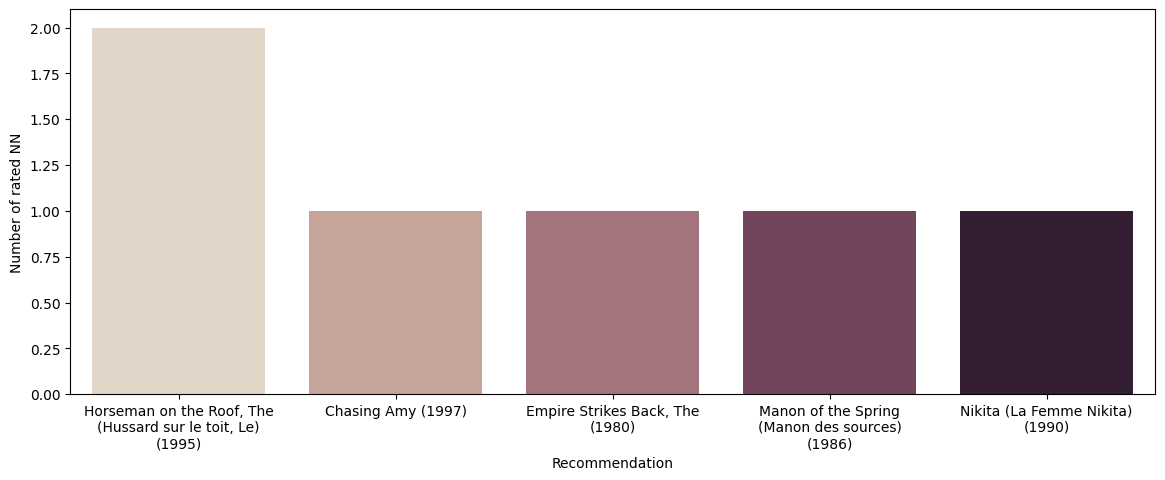

In [40]:
import textwrap

rated_items = np.nonzero(rating_mat[UIDX])[1]
n_nearest_neighbors = []
for rec in recommendations[:TOPK]:
    nearest_neighbors = np.argsort(iknn_adjusted.sim_mat[rec].A.ravel())[-K:]
    n_nearest_neighbors.append(len(np.intersect1d(nearest_neighbors, rated_items)))
rec_df["Number of rated NN"] = n_nearest_neighbors

fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(
    x="Recommendation", y="Number of rated NN", data=rec_df, palette="ch:.25", ax=ax
)
ax.set_xticklabels(textwrap.fill(x.get_text(), 25) for x in ax.get_xticklabels());

In this case, the top recommendation is *Haunted World of Edward D. Wood Jr., The (1995)*, and 9 movies out of its 50 nearest-neighbors have been rated (probably watched) by the user.

## References

1.   Aggarwal, C. C. (2016). Recommender systems (Vol. 1). Cham: Springer International Publishing.
2.   Breese, J. S., Heckerman, D., & Kadie, C. (2013). Empirical analysis of predictive algorithms for collaborative filtering. arXiv preprint arXiv:1301.7363.
3.   Sarwar, B., Karypis, G., Konstan, J., & Riedl, J. (2001, April). Item-based collaborative filtering recommendation algorithms. In Proceedings of the 10th international conference on World Wide Web (pp. 285-295).